In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from collections import Counter
import re
from datetime import datetime as dt
import xlrd.xldate as xd

DEMOGRAPHICS = pd.read_excel("PH_Demographics.xlsx", index_col=1, header=0, parse_cols=21)
ATTENDANCE_LIST = pd.read_excel("Attendance_Master_List.xlsx", header=0)

PIE_COLORS = ["#50b47b","#9750a1","#86a542","#6778d0","#c18839","#b94a73","#b94c3e"]

# DATA REPORT
What we have here is a data summary of the demographics and event information for PantherHackers for the Spring 2017 semester.

For the demographics, I managed to get a representative sample of 60 people to get the following information: age, gender, race, classification, major, why they join PH, coding ability, and preferred technologies.


             Age
count  60.000000
mean   20.816667
std     2.795224
min    16.000000
25%    19.000000
50%    20.000000
75%    22.000000
max    30.000000


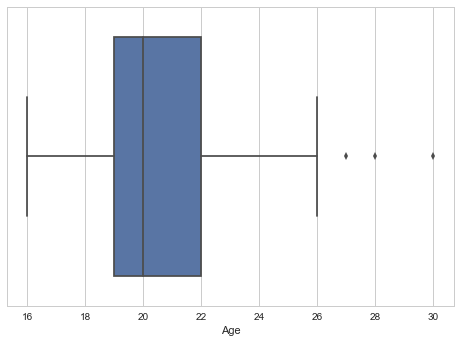

In [17]:
print(DEMOGRAPHICS.describe())
sns.set_style("whitegrid")
ages = sns.boxplot(x=DEMOGRAPHICS.iloc[:, 1])
sns.plt.show()

## Note about race
If you ever wondered why fried rice was approved for the Bash :P. Funnily enough, there was some confusion with the Vietnamese who filled this out; they either put themselves as South Asian or East Asian. Confusion was due to the distinction between Southeast and East Asians so I'll account for that next time.

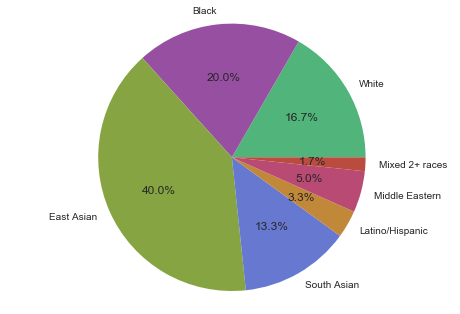

In [18]:
races = {'White': 0, 'Black': 0, 'East Asian': 0, 'South Asian': 0,
         'Latino/Hispanic': 0, 'Middle Eastern': 0, 'Mixed 2+ races': 0}

for i, row in DEMOGRAPHICS.iterrows():
    if row.Race == 'White':
        races['White'] += 1
    elif row.Race == 'Black':
        races['Black'] += 1
    elif row.Race == 'East Asian':
        races['East Asian'] += 1
    elif row.Race == 'South Asian':
        races['South Asian'] += 1
    elif row.Race == 'Latino/Hispanic':
        races['Latino/Hispanic'] += 1
    elif row.Race == 'Middle Eastern':
        races['Middle Eastern'] += 1
    elif row.Race == 'Mixed two or more':
        races['Mixed 2+ races'] += 1

labels = list(races.keys())
slices = list(races.values())

plt.pie(x=slices, labels=labels, colors=PIE_COLORS, autopct='%1.1f%%')
plt.axis('equal')
plt.show()

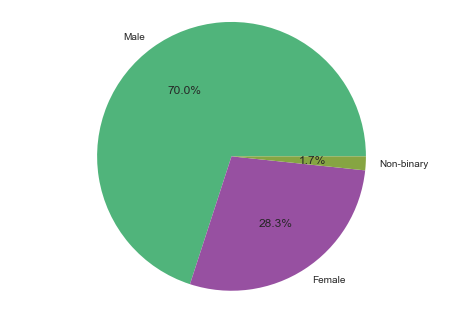

In [19]:
gender = {'Male': 0, 'Female': 0, 'Non-binary': 0}

for i, row in DEMOGRAPHICS.iterrows():
    if row.Gender == 'Male':
        gender['Male'] += 1
    elif row.Gender == 'Female':
        gender['Female'] += 1
    elif row.Gender == 'Non-binary':
        gender['Non-binary'] += 1

labels = list(gender.keys())
slices = list(gender.values())

plt.pie(x=slices, labels=labels, colors=PIE_COLORS, autopct='%1.1f%%')
plt.axis('equal')
plt.show()

## Note about the classification section

So this section is kind of a screw up because I didn’t consider how hours work and that some students took AP classes, dual enrollment, etc. now they’re like juniors in their first year (tryhards ugh). I think the next time I do this, I’ll separate by the amount of time they’ve been in college to see if we’re truly attracting the youth to the club. 

Also, the 'Other' section represents dual enrolled high school students, people going for their second degree, and people past their 4th year in college.

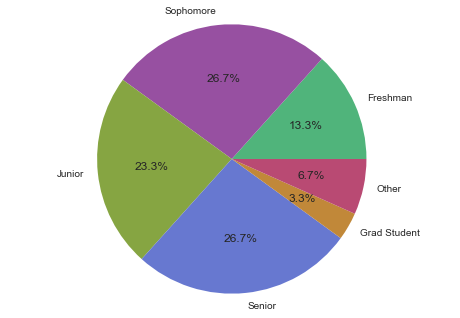

In [21]:
classification = {'Freshman': 0, 'Sophomore': 0, 'Junior': 0, 
                  'Senior': 0, 'Grad Student': 0, 'Other': 0}

for i, row in DEMOGRAPHICS.iterrows():
    if row.Classification == 'Freshman':
        classification['Freshman'] += 1
    elif row.Classification == 'Sophomore':
        classification['Sophomore'] += 1
    elif row.Classification == 'Junior':
        classification['Junior'] += 1
    elif row.Classification == 'Senior':
        classification['Senior'] += 1
    elif row.Classification == 'Graduate Student':
        classification['Grad Student'] += 1
    else:
        classification['Other'] += 1

labels = list(classification.keys())
slices = list(classification.values())

plt.pie(x=slices, labels=labels, colors=PIE_COLORS, autopct='%1.1f%%')
plt.axis('equal')
plt.show()

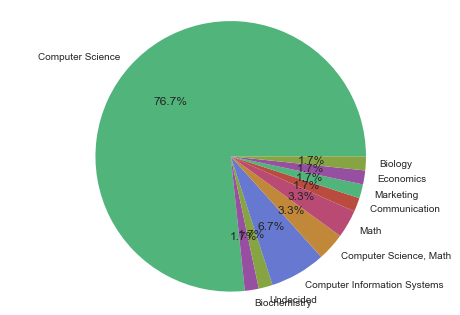

In [14]:
majors = dict(Counter(DEMOGRAPHICS['Major'].tolist()))
labels = list(majors.keys())
slices = list(majors.values())

plt.pie(x=slices, labels=labels, colors=PIE_COLORS, autopct='%1.1f%%')
plt.axis('equal')
plt.show()

## Note about reasons for joining PH

The most important section in my opinion. PH is run by the Power of Friendship(TM) clearly, with the runners-up being networking and coding skills. I think the kinds of events we’ve been having have been catering to that want pretty well. We should probably focus more on bringing in outside professionals and companies to PH events for more networking opportunities (though we already are with the conference so this is redundant) and those with jobs already could help by making themselves known.

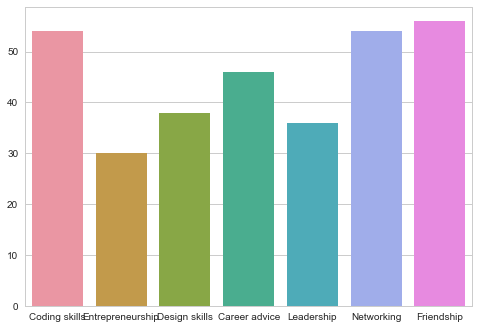

In [23]:
reasons = {'Coding skills': 0,
           'Entrepreneurship': 0,
           'Design skills': 0,
           'Career advice': 0,
           'Leadership': 0,
           'Networking': 0,
           'Friendship': 0}

for i, row in DEMOGRAPHICS.iterrows():
    if row[12] == 'Coding skills':
        reasons['Coding skills'] += 1
    if row[13] == 'Entrepreneurial skill':
        reasons['Entrepreneurship'] += 1
    if row[14] == 'Design skills':
        reasons['Design skills'] += 1
    if row[15] == 'Career advice':
        reasons['Career advice'] += 1
    if row[16] == 'Leadership experience':
        reasons['Leadership'] += 1
    if row[17] == 'Networking':
        reasons['Networking'] += 1
    if row[18] == 'Friendship':
        reasons['Friendship'] += 1
    
x = list(reasons.keys())
y = list(reasons.values())
sns.axes_style('white')
sns.set_style('whitegrid')
sns.barplot(x, y)
sns.plt.show()

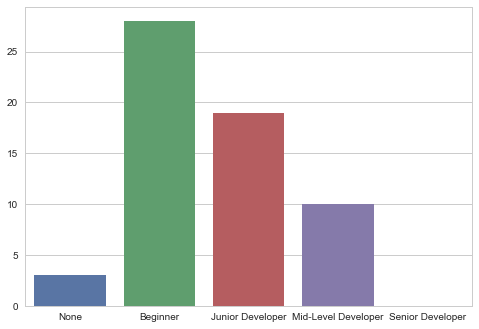

In [24]:
experience = {'None': 0,
              'Beginner': 0,
              'Junior Developer': 0,
              'Mid-Level Developer': 0,
              'Senior Developer': 0
             }
for i, row in DEMOGRAPHICS.iterrows():
    if row[11] == 'None':
        experience['None'] += 1
    elif row[11] == 'Beginner':
        experience['Beginner'] += 1
    elif row[11] == 'Junior Developer':
        experience['Junior Developer'] += 1
    elif row[11] == 'Mid-Level Developer':
        experience['Mid-Level Developer'] += 1
    elif row[11] == 'Senior Developer':
        experience['Senior Developer'] += 1
        
x = list(experience.keys())
y = list(experience.values())
sns.axes_style('white')
sns.set_style('whitegrid')
sns.barplot(x, y)
sns.plt.show()

## Note about who's a hacker, hipster, or hustler (or some combination of the three)

I know we've moved away from this, but it still helps to know.

I need to fix the annotations for the combinations graph at the bottom T_T. If you can't read it, it goes as follows: 
Hipster, HackerHipster, Hacker, HackerHustler, HackerHipsterHustler, Hustler, HipsterHustler

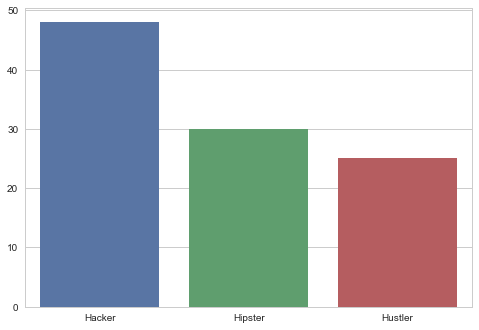

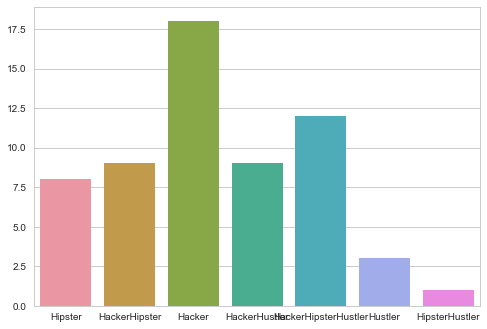

In [28]:
# Hacker, hustler, hipster
# TODO: not make the annotations run into each other

def combo(hacker, hipster, hustler):
    combination = ''
    if hacker == 'Hacker':
        combination += hacker
    if hipster == 'Hipster':
        combination += hipster
    if hustler == 'Hustler':
        combination += hustler
    return combination
    
hhh = {'Hacker': 0, 'Hipster': 0, 'Hustler': 0}
combinations = []
for i, row in DEMOGRAPHICS.iterrows():
    if row[8] == 'Hacker':
        hhh['Hacker'] += 1
    if row[9] == 'Hipster':
        hhh['Hipster'] += 1
    if row[10] == 'Hustler':
        hhh['Hustler'] += 1
    combinations.append(combo(row[8], row[9], row[10]))
        
hhh_x = list(hhh.keys())
hhh_y = list(hhh.values())
sns.axes_style('white')
sns.set_style('whitegrid')
sns.barplot(hhh_x, hhh_y)
sns.plt.show()

combinations_x = list(Counter(combinations).keys())
combinations_y = list(Counter(combinations).values())
sns.barplot(combinations_x, combinations_y)
sns.plt.show()

# # Note about preferred technologies

What I have sumermized from the responses:

Most popular languages: Java, Python, Swift

IntelliJ > Eclipse

Raspberry Pi > Arduino

Unity > Unreal

Sublime > Atom > Vim >>>>>>>>>>>>>>>>>>>>>>>>>> Notepad++

Someone knows Matlab, god bless them


I see this was kind of a vague question and could've been broken down into more specific questions. Or just make a whole separate 'developers survey'.


In [23]:
# most common technologies people use

def multi_split(string, separators):
    
    separators = tuple(separators)
    stack = [string, ]
    
    for separator in separators:
        for i, substring in enumerate(stack):
            substack = substring.split(separator)
            stack.pop(i)
            for j, subsubstring in enumerate(substack):
                stack.insert(i+j, subsubstring)
    return stack


words = ""
for i, row in DEMOGRAPHICS.iterrows():
    preferred_tech_cell = str(row[20])
    words += " " + preferred_tech_cell

a = Counter(multi_split(words, (' ', ',', '.')))
print(a.most_common())

[('', 125), ('Java', 26), ('Python', 16), ('and', 6), ('Linux', 6), ('Android', 4), ('IntelliJ', 4), ('nan', 3), ('MySQL', 3), ('Swift', 3), ('Unity', 3), ('for', 3), ('Ruby', 3), ('PHP', 3), ('C#', 3), ('JavaScript', 3), ('Windows', 3), ('C++', 3), ('Javascript', 2), ('languages', 2), ('Studio', 2), ('laptop', 2), ('Analysis', 2), ('Sublime', 2), ('Adobe', 2), ('Raspberry', 2), ('Arduino', 2), ('Data', 2), ('R', 2), ('-', 2), ('android', 2), ('development', 2), ('gaming', 2), ('Git', 1), ('Cisco', 1), ('Flask', 1), ('over', 1), ('high-level', 1), ('NOTEPAD++', 1), ('yet', 1), ('galaxy', 1), ('Gaming', 1), ('Full', 1), ('PyCharm', 1), ('TWINE', 1), ('Illustrator', 1), ('Mobile', 1), ('iOS', 1), ('XPS', 1), ('using', 1), ('WACOM', 1), ('VIM', 1), ('SQL', 1), ('language:', 1), ('Pis', 1), ('OS', 1), ('Networks', 1), ('A', 1), ('sublime/atom', 1), ('Tableau', 1), ('Lua', 1), ('computer', 1), ('Hopefully', 1), ('loops', 1), ('Pi', 1), ('3D', 1), ('WHAT', 1), ('PCs', 1), ('DevOps', 1), ('UX

                    Event       Date    0
0            API Workshop 2017-01-17   24
8              Meeting[1] 2017-02-01  178
7     Java Bootcamp Day 1 2017-02-06   25
9           MidnightHacks 2017-02-24   34
2        Full Stack Day 1 2017-02-27   20
3        Full Stack Day 2 2017-02-28   15
4        Full Stack Day 3 2017-03-01    7
5        Full Stack Day 4 2017-03-02   15
6        Full Stack Day 5 2017-03-03   10
10      MidnightHacks 1.5 2017-03-23   15
11  Python Bootcamp Day 1 2017-03-27   17
12  Python Bootcamp Day 2 2017-03-28    8
13  Python Bootcamp Day 3 2017-03-29   12
14  Python Bootcamp Day 4 2017-03-30   15
1                    EOSB 2017-04-19   36


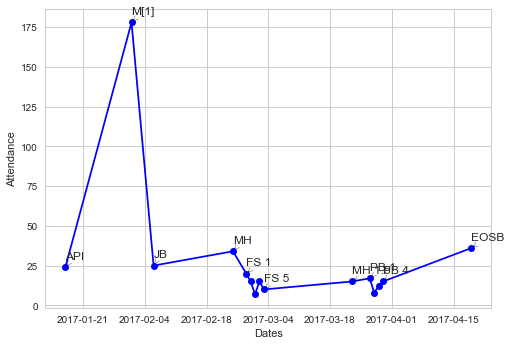

In [32]:
# TODO: place the captions different places so they aren't overlapping
# Add GGJ and Social (even though they're kinda special cases)

plt.xlabel('Dates')
plt.ylabel('Attendance')

for i, row in ATTENDANCE_LIST.iterrows():
    row['Date'] = row['Date'].to_pydatetime()

av = pd.DataFrame(ATTENDANCE_LIST.groupby(['Event','Date']).size()).reset_index().sort_values('Date')
print(av)

labels = ['API', 'M[1]', 'JB', 'MH', 'FS 1', 'FS 2', 'FS 3', 'FS 4', 'FS 5', 'MH 1.5', 'PB 1',
          'PB 2', 'PB 3', 'PB 4', 'EOSB']

for label, x, y in zip(labels, av['Date'], av.iloc[:, 2]):
    if label == 'FS 2' or label == 'FS 3' or label == 'FS 4':
        continue
    if label == 'PB 2' or label == 'PB 3':
        continue

    plt.annotate(
        label,
        xy=(x, y), xytext=(x, y+5),
        arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'),
    )
plt.plot(av['Date'], av.iloc[:, 2], '-bo')

plt.show()